This demo describes an example of a multicellular model implementing a toggle switch using models of multicellular biological YES and NOT gates defined in `models_multicell.py`.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import models_multicell
from parameters import *

# Toggle switch model
An example of a toogle switch model connecting two mutually inhibiting NOT gates (see Fig. E).

![](https://ars.els-cdn.com/content/image/1-s2.0-S0010482520304406-gr1.jpg)

A more detailed description of this model is available at (https://doi.org/10.1016/j.compbiomed.2020.104109).

In [2]:
def toggle_model(T, state, *params):
    L_A, L_B, a, b = state

    state_A = L_A, a, b
    state_B = L_B, b, a
    
    delta_L, gamma_A, gamma_B, n_a, n_b, theta_A, theta_B, eta_a, eta_b, omega_a, omega_b, m_a, m_b, delta_a, delta_b, rho_a, rho_b = params

    params_A = delta_L, gamma_A, n_b, theta_A, eta_a, omega_a, m_a, delta_a, rho_a
    params_B = delta_L, gamma_B, n_a, theta_B, eta_b, omega_b, m_b, delta_b, rho_b

    dL_A_dt, da_dt = models_multicell.not_cell(state_A, params_A)
    dL_B_dt, db_dt = models_multicell.not_cell(state_B, params_B)
    
    return np.array([dL_A_dt, dL_B_dt, da_dt, db_dt])
 

# Testing the model

### Setting the parameters

In [6]:
params = [delta_L, 
          gamma_A, 
          gamma_A,
          n_a, 
          n_a, 
          theta_A, 
          theta_A, 
          eta_a, 
          eta_a, 
          omega_a, 
          omega_a, 
          m_a, 
          m_a, 
          delta_a, 
          delta_a, 
          rho_a, # increased degradation rates are used to trigger a switch
          rho_a] # increased degradation rates are used to trigger a switch

t_end = 250

### Running the simulation and plotting the results

[]

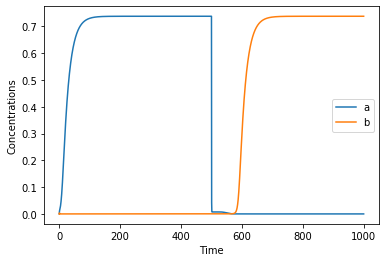

In [7]:
# set simulation parameters
N = t_end*10 # number of samples
T = np.linspace(0, t_end, N)

Y0 = np.zeros(4)
Y0[2] = 0

###
# first case: b is degraded which means a will be activated
# degrade b --> activate a
params[-2] = 0 # rho_a
params[-1] = rho_a # rho_b
sol = solve_ivp(toggle_model, [0, t_end], Y0, args=params, dense_output=True)
z = sol.sol(T)

AB = z.T[:, 2:]
TT = T

###
# second case: the state is held
# hold
Y0 = z.T[-1, :]
params[-2] = 0 # rho_a
params[-1] = 0 # rho_b

sol = solve_ivp(toggle_model, [0, t_end], Y0, args=params, dense_output=True)
z = sol.sol(T)

AB = np.concatenate((AB, z.T[:, 2:]), axis=0)
TT = np.concatenate((TT, t_end+T), axis=0)

###
# third case: switch is iniated by increasing the degradation rate of a
# degrade a --> activate b
Y0 = z.T[-1, :]
params[-2] = rho_a # rho_a
params[-1] = 0 # rho_b

sol = solve_ivp(toggle_model, [0, t_end], Y0, args=params, dense_output=True)
z = sol.sol(T)

AB = np.concatenate((AB, z.T[:, 2:]), axis=0)
TT = np.concatenate((TT, 2*t_end+T), axis=0)

###
# fourth case: the state is held
# hold
Y0 = z.T[-1, :]
params[-2] = 0 # rho_a
params[-1] = 0 # rho_b

sol = solve_ivp(toggle_model, [0, t_end], Y0, args=params, dense_output=True)
z = sol.sol(T)

AB = np.concatenate((AB, z.T[:, 2:]), axis=0)
TT = np.concatenate((TT, 3*t_end+T), axis=0)

ax = plt.gca()

ax.plot(TT, AB)
ax.legend(['a','b'])
ax.set_xlabel('Time')
ax.set_ylabel('Concentrations')  

plt.plot()